## Unsupervised Machine Learning

Up to this point, we've been working with machine learning to predict values. These values can be whether a particular student will be admitted to a scholar program, whether a patient has heart disease, etc. In these scenarios, we're working with supervised machine learning.

In supervised machine learning, the dataset contains a target variable that we're trying to predict. As the name suggests, we can supervise our model's performance since it's possible to objectively verify if its outputs are correct.



As there's no target variable, we can't supervise the algorithm by objectively telling whether or not the outputs are correct. Therefore, it's up to the data scientist to analyze the outputs and understand the pattern the algorithm found in the data.

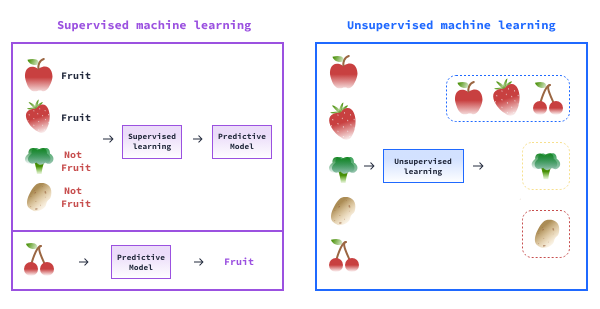

Common unsupervised machine learning types:

- `Clustering`: the process of segmenting the dataset into groups based on the patterns found in the data. Used to segment customers and products, for example.
- `Association`: the goal is to find patterns between the variables, not the entries. It's frequently used for market basket analysis, for instance.
- `Anomaly detection`: this kind of algorithm tries to identify when a particular data point is completely off the rest of the dataset pattern.

## The K-means Algorithm

In this course, we'll focus on the use of unsupervised machine learning for clustering with the K-means algorithm. The K-means algorithm is an iterative algorithm designed to find a split for a dataset given a number of clusters set by the user. In other words, the K-means algorithm helps us split our population into a given number of groups. The number of clusters is called K.

As an iterative algorithm, K-means is based on repeating the same process over and over again for a determined number of times or until it reaches a determined stopping condition. For K-means, the algorithm randomly chooses K points to be the centers of the clusters. These points are called the clusters' centroids. K is set by the user. Then, an iterative process begins where each iteration is made of the following steps:

- Calculate the euclidean distance between each data point to each centroid.
- Assign each data point as belonging to the cluster of the closest centroid.
- Calculate new centroids using the mean of the datapoints in each cluster.

The algorithm will then run until a maximum number of iterations is reached or until the centroids no longer change.

Note that, in each iteration, new centroids (the big dots) are calculated and then new clusters are reassigned.

During this course, we'll use a dataset containing information about customers of a mall. The goal is to use the data to segment the customers into groups.

The dataset contains the following columns:

- `CustomerID`: a unique identifier for each customer.
- `Gender`: the gender of the customer.
- `Age`: the customer's age in years.
- `Annual Income`: the customer's annual income in thousand of dollars.
- `Spending Score`: a score based on customer shopping patterns. Goes from 1 to 100.

## A Pictorial Approach

On this screen, we'll see the K-means algorithm working step by step.

Suppose we have a dataset with twenty rows and two variables. We're not interested in what these variables are or what they represent at this point. Let's just call them X and Y.

First, let's see a scatter plot of these two variables:

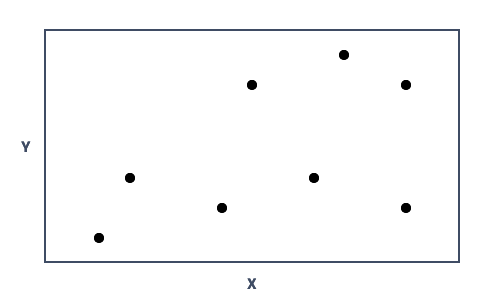

The first step of the algorithm is to initialize random centroids. In this case, three centroids. On top of the previous scatter plot, we now have three colored dots representing each of these centroids:

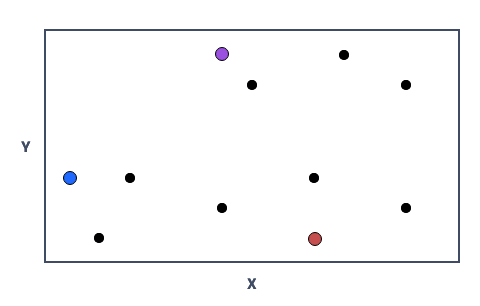

The algorithm then calculates the distance from each point to each centroid and assigns each point as belonging to the closest centroids.

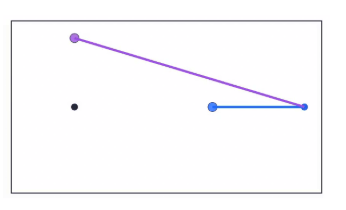

The group of data points belonging to a single centroid is what we call a cluster. In the plot below, each cluster is represented by a color. Let's name these clusters 1, 2, and 3.

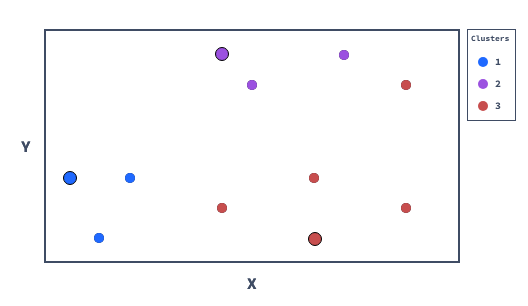

That was the first iteration: centroids were initialized and clusters assigned.

For the second iteration, we'll have new centroids. However, they won't be random anymore. The centroids coordinates will now be the mean of all x-axis coordinates and the mean y-axis coordinates of all points belonging to its cluster.

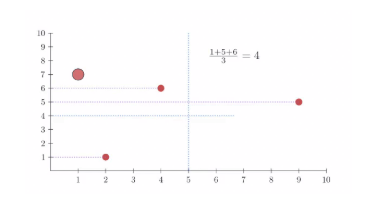

The chart below shows the new centroids, before reassigning the clusters.

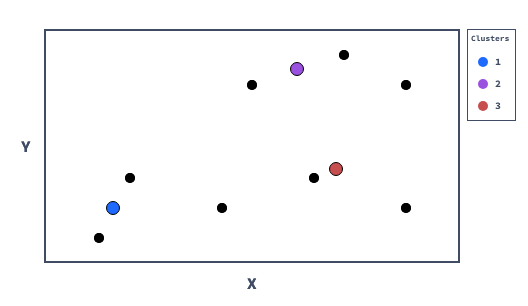

The distances are recalculated, and all the clusters are assigned again:

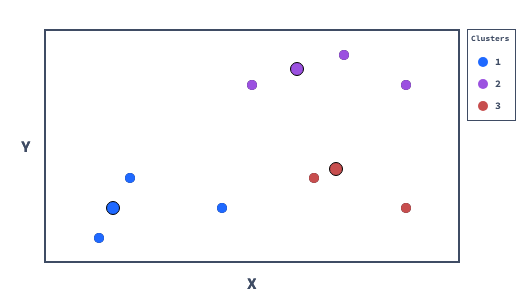

Notice that most points were kept in the same cluster. That means that after the centroids changed, the closest centroid to those points remained the same. However, some points changed colors, which means that their closest centroid did change, and, therefore, they are assigned to a new cluster.

The following two steps would look like this:

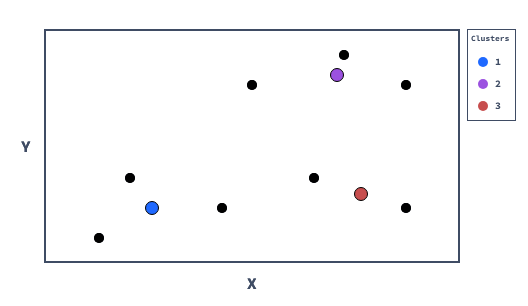

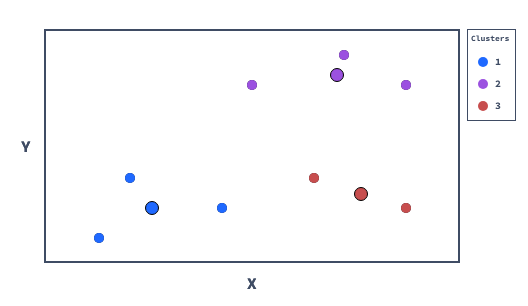

This process will proceed until the centroids are located in the mean of their cluster, which is the same as saying the iteration will continue until the coordinates of the centroids don't change anymore (or until we decide to stop the algorithm).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')
customers.head()

CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

In [3]:
customers.shape

(200, 5)

In [4]:
customers.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [5]:
customers.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [6]:
customers.describe()

CustomerID         Age  Annual Income  Spending Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000

##  Initialize Centroids

Now that we've become familiar with the dataset, we'll start to build our own clustering algorithm. This will be a simple version of K-means intended to help us understand the concepts and mechanics behind the actual algorithm.

We'll follow the steps listed before in order to segment the customers and also visualize the segmentation. To make the visualization easier, the clustering will be performed using only two clusters and two variables, Age and Spending Score, which makes it possible to plot in the two-dimensional chart.

The first step is to randomly initialize the centroids. Then we'll need to save the coordinates of each centroid in order to later compare to each data point.

Let's do this!

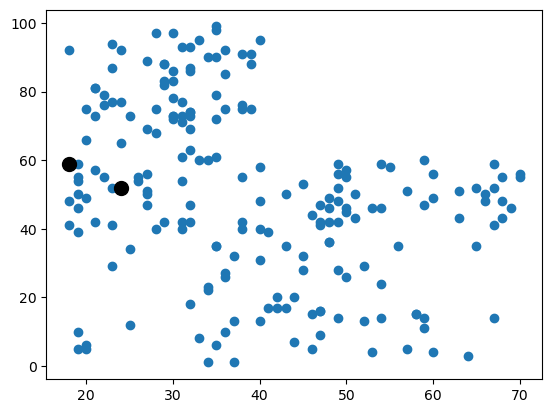

In [7]:
cols_to_keep = ['Age', 'Spending Score']

customers = customers[cols_to_keep].copy()

centroids = customers.sample(2)

def fetch_coordinates(df):
    age_centroid_1 = df.iloc[0, 0]
    score_centroid_1 = df.iloc[0, 1]
    age_centroid_2 = df.iloc[1, 0]
    score_centroid_2 = df.iloc[1, 1]
    return age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2
  
age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)

plt.scatter(customers['Age'], customers['Spending Score'])
plt.scatter(centroids['Age'], centroids['Spending Score'], color='black', s=100)
plt.show()

## Distances Between the Points

Now that we've initialized the first couple of centroids, we need to calculate the (Euclidean) distance between each customer to each of the centroids.

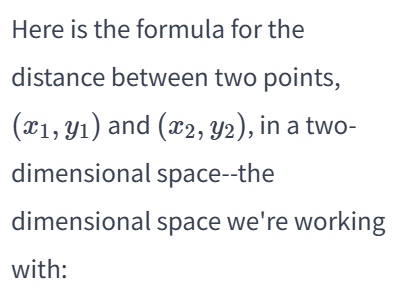

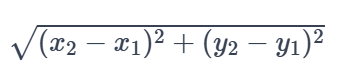

The formula calculates the squared distance between the corresponding coordinates of each point, adds them together, and takes the square root.

Pictorially, the result is the length of the line that connects the two points.

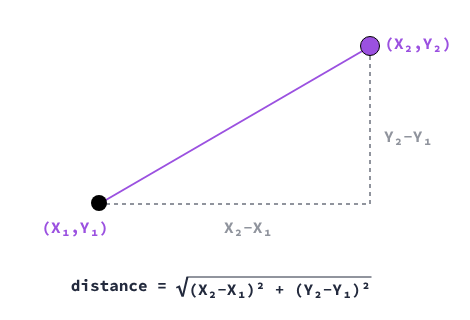

This formula can be easily translated into Python. For instance, to calculate the distance between the two centroids in new columns of the centroids DataFrame, all we need to do is this:

In [8]:
# centroids['dist_centroid_1'] = np.sqrt((centroids['Age'] - age_centroid_1)**2 + (centroids['Spending Score'] - score_centroid_1)**2)
# centroids['dist_centroid_2'] = np.sqrt((centroids['Age'] - age_centroid_2)**2 + (centroids['Spending Score'] - score_centroid_2)**2)

Note that the distance between each centroid to itself is zero.

This formula will be used to calculate the distance from every blue dot to both of the black dots in the scatter plot below:

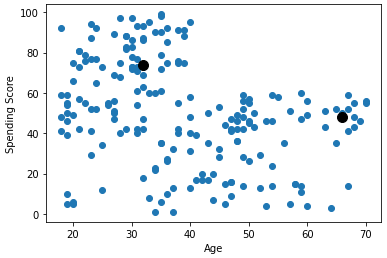

In [9]:
def calculate_distance(row, age_centroid, score_centroid):
    distance = np.sqrt((row['Age'] - age_centroid) ** 2 + (row['Spending Score'] - score_centroid) ** 2)
    return distance

In [10]:
customers['dist_centroid_1'] = customers.apply(lambda x: calculate_distance(x, age_centroid_1, score_centroid_1), axis=1)

In [11]:
customers['dist_centroid_2'] = customers.apply(lambda x: calculate_distance(x, age_centroid_2, score_centroid_2), axis=1)

In [12]:
customers

Age  Spending Score  dist_centroid_1  dist_centroid_2
0     19              39        20.024984        13.928388
1     21              81        22.203603        29.154759
2     20               6        53.037722        46.173586
3     23              77        18.681542        25.019992
4     31              40        23.021729        13.892444
..   ...             ...              ...              ...
195   35              79        26.248809        29.154759
196   45              28        41.109610        31.890437
197   32              74        20.518285        23.409400
198   32              18        43.324358        34.928498
199   30              83        26.832816        31.575307

[200 rows x 4 columns]

## Assigning Clusters

At this point, we have the distance from each customer to both of the clusters' centroids. Therefore, all we need to do is to assign each customer to the cluster with the closer centroid.

Once we have that, we can visualize how the first split went by creating a scatter plot. However, in this plot, we want to use different colors for different clusters so we can actually see the difference.

A couple of screens ago, we used the `plt.scatter()` function to plotting. Although `matplotlib` is great, some particular tricks can be a bit hard to implement. Creating a scatter plot with different colors is one of them.

The seaborn library is another great visualization tool and it provides an easier to way implement what we need. The [seaborn.scatterplot()](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function is very similar to the plt.scatter(), with the following differences:

- `x` and `y` parameters don't receive the columns, just their name, which means that instead of `df['columns_name']`, it receives `'column_name'`.
- There's a `data` parameter that receives the DataFrame in which the columns are contained.
- There's the optional hue parameter. This parameter represents the column by which we divide the scatter plot in different colors.

This function will be very useful for visualizing the clusters we created.

In [13]:
def calculate_distance_assign_clusters(customers, centroids):
    age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)
    customers['dist_centroid_1'] = customers.apply(lambda x: calculate_distance(x, age_centroid_1, score_centroid_1), axis=1)
    customers['dist_centroid_2'] = customers.apply(lambda x: calculate_distance(x, age_centroid_2, score_centroid_2), axis=1)
    customers['cluster'] = np.where(customers['dist_centroid_1'] < customers['dist_centroid_2'], 1, 2)
    return customers
    

In [14]:
customers = calculate_distance_assign_clusters(customers, centroids)

In [15]:
customers

Age  Spending Score  dist_centroid_1  dist_centroid_2  cluster
0     19              39        20.024984        13.928388        2
1     21              81        22.203603        29.154759        1
2     20               6        53.037722        46.173586        2
3     23              77        18.681542        25.019992        1
4     31              40        23.021729        13.892444        2
..   ...             ...              ...              ...      ...
195   35              79        26.248809        29.154759        1
196   45              28        41.109610        31.890437        2
197   32              74        20.518285        23.409400        1
198   32              18        43.324358        34.928498        2
199   30              83        26.832816        31.575307        1

[200 rows x 5 columns]

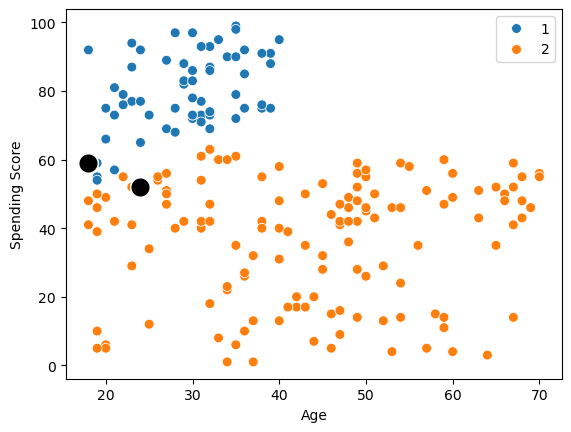

In [16]:
sns.scatterplot(customers, x='Age', y='Spending Score', hue='cluster',palette='tab10', s=50)
sns.scatterplot(centroids, x='Age', y='Spending Score', color='black', s=200)
plt.show()

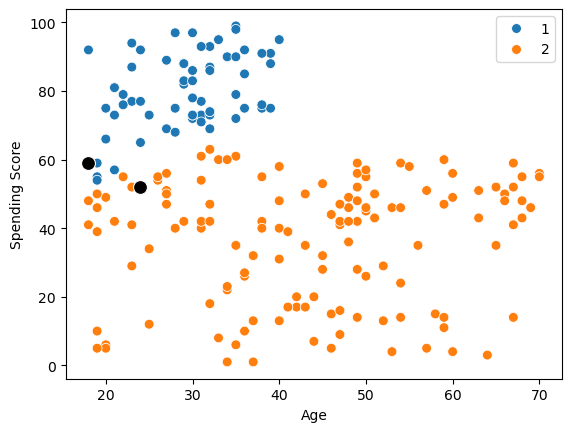

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_distance_assign_clusters(customers, centroids):
    age_centroid_1, score_centroid_1, age_centroid_2, score_centroid_2 = fetch_coordinates(centroids)
    customers['dist_centroid_1'] = customers.apply(calculate_distance, args=(age_centroid_1, score_centroid_1), axis=1)
    customers['dist_centroid_2'] = customers.apply(calculate_distance, args=(age_centroid_2, score_centroid_2), axis=1)
    customers['cluster'] = np.where(
        customers['dist_centroid_1'] < customers['dist_centroid_2'], 1, 2
    )
    return customers
customers = calculate_distance_assign_clusters(customers, centroids)
  
sns.scatterplot(x='Age', y='Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
sns.scatterplot(x='Age', y='Spending Score', color='black', data=centroids, s=100)
plt.show()

##  Creating New Clusters

We have our first cluster split. However, the K-means algorithm consists of multiple iterations until the centroids converge to the mean of their clusters.

We'll perform the next step in this iteration by creating new centroids and assigning clusters for a second time.

As the name of the algorithm suggests, the new centroids are calculated by the mean of each of the K clusters, in our case, the mean of the two clusters.

Once we have the Age and Spending Score coordinates from the new centroids, the process will repeat:

1. Calculate the distance of each customer to the new centroids.
2. Assign new clusters to the customer based on the new distances.
3. Visualize the new clusters.

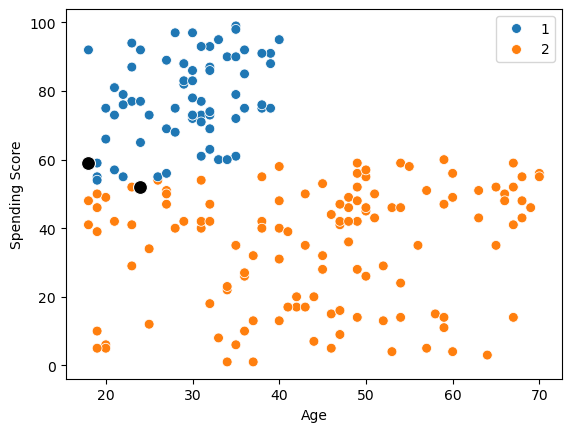

In [18]:
new_centroids = customers.groupby('cluster')[['Age', 'Spending Score']].mean().reset_index()
new_centroids.drop('cluster', axis=1, inplace=True)
customers = calculate_distance_assign_clusters(customers, new_centroids)
sns.scatterplot(x='Age', y='Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
sns.scatterplot(x='Age', y='Spending Score', color='black', data=centroids, s=100)
plt.show()

## Wrapping in a Function

We have so far built an algorithm that performs two iterations and splits the dataset into two clusters.

Before we move on, let's first wrap everything we've done so far inside a single, consolidated function. Then we'll be able to build from this and develop a more complex algorithm.

This function should receive the `customers` DataFrame as an argument, then do the entire process we have developed in this lesson.



In [19]:
cols_to_keep = ['Age', 'Spending Score']

customers = customers[cols_to_keep].copy()


def create_clusters(df):
    centroids = df.sample(2)
    df = calculate_distance_assign_clusters(df, centroids)
    new_centroids = df.groupby('cluster')[['Age', 'Spending Score']].mean().reset_index()
    new_centroids.drop('cluster', axis=1, inplace=True)
    customers = calculate_distance_assign_clusters(df, new_centroids)
    return df['cluster']


clusters = create_clusters(customers)
print(clusters)

0      1
1      2
2      1
3      2
4      1
      ..
195    2
196    1
197    2
198    1
199    2
Name: cluster, Length: 200, dtype: int32


## Iterative K-means algorithm

### Initialize K Centroids

In the previous lesson, we built our first version of a K-means-based algorithm. This initial version was capable of splitting the dataset twice, and we were able to notice some differences and improvements from the first to second split.

We'll now build from what we've done in order to develop a more robust, complete version of K-means. In this version, the code will cluster the data not twice, but as many times as necessary for the centroids to converge towards the mean of their clusters — or until it reaches a maximum number of iterations (N) that we'll set.

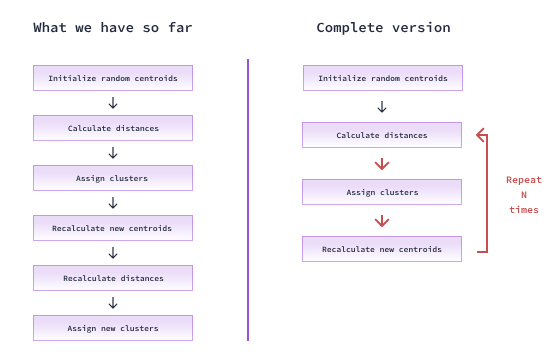

Another important improvement from the first version is that we'll be able to use a different number of clusters (K) through the same code without being limited to splitting the dataset between only two clusters, as in lesson one.

Finally, in the new implementation, we'll still only work with two variables; however, we'll write more flexible code that does not rely on the variables' names, allowing the users to use any combinations of features they want to.

To achieve all this, we'll first need to initialize as many centroids as we want. Remember that in the previous lesson, our `fetch_coordinates` function was only capable of dealing with two centroids.

We'll use the `Annual Income` instead of the `Age` column, alongside `Spending Score`.

In [20]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep]

def get_centroids(df, k):
    centroids = df.sample(k).reset_index(drop=True)
    return centroids, centroids.values.tolist()

def calculate_distance(df, centroids_coords):
    names = []
    for i, centroid in enumerate(centroids_coords):
        name = f'dist_centroid_{i + 1}'
        df[name] = np.sqrt((df.iloc[:,0] - centroid[0])**2 + (df.iloc[:,1] - centroid[1])**2)
        names.append(name)
    
    return df, names

centroids, coords = get_centroids(customers, 3)
customers, dist_names = calculate_distance(customers, coords)

print(customers)
print(dist_names)

     Annual Income  Spending Score  dist_centroid_1  dist_centroid_2  \
0               15              39        38.013156        76.843998   
1               15              81         4.123106        98.412398   
2               16               6        71.000000        72.560320   
3               16              77         0.000000        95.015788   
4               17              40        37.013511        75.272837   
..             ...             ...              ...              ...   
195            120              79       104.019229        71.554175   
196            126              28       120.420098        40.162171   
197            126              74       110.040901        70.178344   
198            137              18       134.617978        49.091751   
199            137              83       121.148669        83.815273   

     dist_centroid_3  
0          66.573268  
1          56.320511  
2          88.238314  
3          55.036352  
4          64.350602

In [21]:
coords

[[16, 77], [88, 15], [71, 75]]

## Calculating Distances

You may remember how we calculated the distances between the centroids and the data points in the previous lesson. We used the Euclidean distance formula to create new columns in the `customers` DataFrame for each centroid. This means that we ended up with two columns: `dist_centroid_1` and `dist_centroid_2`.
As we now need to calculate the distance for any number of centroids we want to, that approach won't work anymore. We need to write code that will create k new columns from the dist_centroid_1 to dist_centroid_k.la

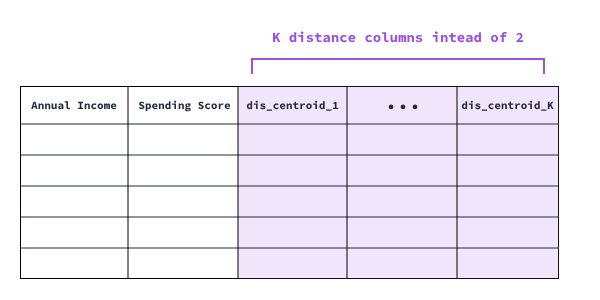

In the code displayed on below, we started creating a function called `calculate_distance` that takes a two-column DataFrame and the list of lists with the centroids' coordinates as inputs. Inside the function, we'll initialize an empty list called `names`. The function then loops through the centroids' coordinates list using `enumerate`, so we can have access to the value and the index of each inner list.

## Assigning Clusters

We're now able to initialize as many centroids as we want and also calculate the distance from each point to as many centroids, too. The next step is to assign clusters.

When we limit the algorithm to only two clusters, it's much easier to determine the cluster for a point. It's only a matter of comparing two distances. We now need to be able to compare as many distances as we want, which demands a different approach.

That's the reason the `calculate_distance` function from the last screen returns not only the DataFrame with the distance columns, but also the names of such columns.

This list with names will be used to select only the columns containing the distances so we can select the one closer to the data point.

The `DataFrame.idxmin()` method returns the index of the minimum value in columns. However, if we set `axis=1`, it returns the columns with the minimum value in a row. We can then create the `cluster` column to select the column with the minimum distance:

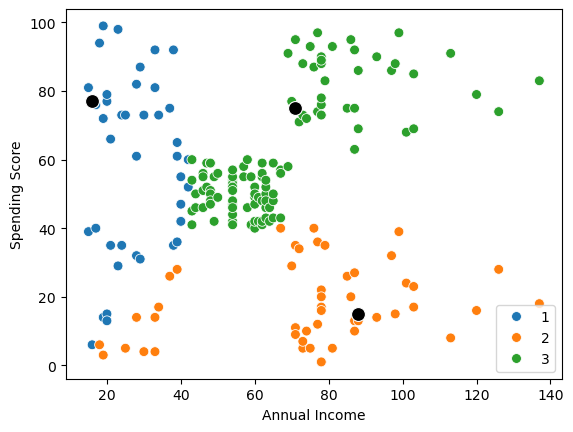

In [22]:
customers['cluster'] = customers[dist_names].idxmin(axis=1).str[-1].astype(int)
sns.scatterplot(customers, x='Annual Income', y='Spending Score', hue='cluster', palette='tab10', s=50)
sns.scatterplot(centroids, x='Annual Income', y='Spending Score', color='black', s=100)
plt.show()

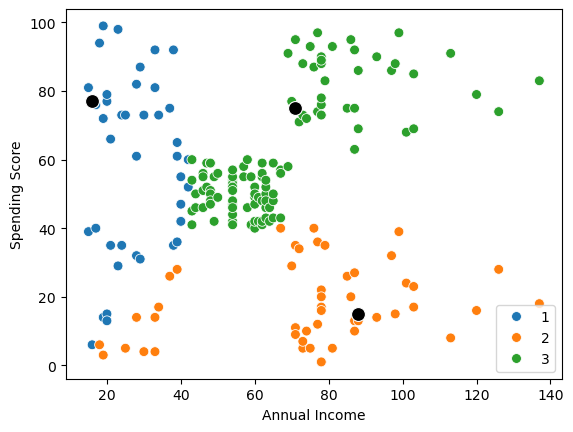

In [23]:
customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]
# print(customers)
sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster', palette='tab10', data=customers, s=50)
sns.scatterplot(x='Annual Income', y='Spending Score', color='black', data=centroids, s=100)

plt.show()

## Recalculating Centroids

It's now time to recalculate the centroids again, just like in this image from the previous lesson:

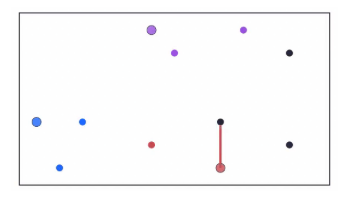

As we've seen before, the centroids are only randomly initialized once, and, from the second time on, they are the mean of all points in their cluster. This means that we do not need to use the get_centroids function again.

The process of recalculating centroids is similar to what we've done in the last lesson, but now we'll also extract the coordinates of the centroids.

In [24]:
variables = customers.columns[:2]

new_centroids = customers.groupby('cluster')[variables].mean()
new_centroids.reset_index().drop('cluster', axis=1, inplace=True)
new_coords = new_centroids.map(lambda x: round(x, 4)).values.tolist()
new_coords

[[27.5714, 58.6905], [74.8776, 17.7347], [66.8349, 61.5229]]

In [25]:
variables = customers.columns[:2]


new_centroids = round(customers.groupby('cluster')[variables].mean(), 4)
new_coords = new_centroids.values.tolist()

print(new_centroids)
print(new_coords)

         Annual Income  Spending Score
cluster                               
1              27.5714         58.6905
2              74.8776         17.7347
3              66.8349         61.5229
[[27.5714, 58.6905], [74.8776, 17.7347], [66.8349, 61.5229]]


## Creating an Iterative Process

Until now, we've taken every step to build the algorithm separately. It's time to start putting the pieces together.

The process we've done so far consists of:

1. Initializing random centroids.
2. Calculating distances.
3. Assigning clusters.
4. Recalculating new centroids.
5. Recalculating distances.
6. Assigning new clusters.

This list consists of only one iteration of the K-means algorithm. However, because it's an iterative algorithm, we should make our code repeat part of the process over and over again until the clusters no longer change or a maximum number of iterations is reached. To achieve that, all the other steps aside from the initialization of the first centroids should be inside a for loop. The number of iterations in the for loop will be the maximum number of iterations performed by the algorithm.

In this screen, we'll start the entire process from the beginning, building on everything we've done so far.

For this screen's exercise, we have already

- Read the DataFrame.

- Selected the columns we want to use.

- Created a list containing these columns.

- Initialized the first centroids.

In [26]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()

variables = customers.columns

centroids, coords = get_centroids(customers, 2)

13


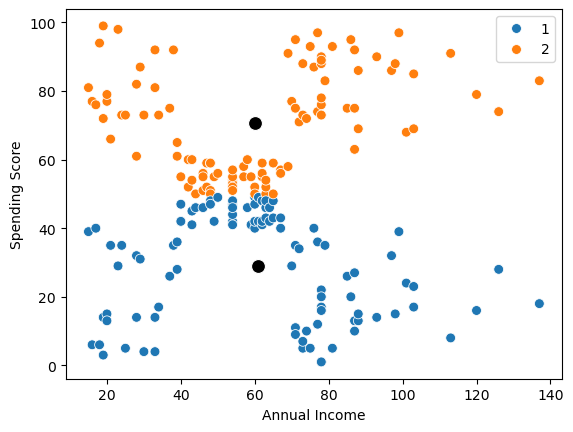

In [27]:
for i in range(100):
    last_coords = coords.copy()
    customers, dist_names = calculate_distance(customers, coords)
    customers['cluster'] = customers[dist_names].idxmin(axis=1).str[-1]
    centroids = customers.groupby('cluster')[variables].mean()
    centroids.reset_index().drop('cluster', axis=1, inplace=True)
    coords = centroids.values.tolist()
    if last_coords == coords:
        break
    
print(i+1)

# customers['cluster'] = customers[dist_names].idxmin(axis=1).str.split('_').str[-1]
# print(customers)
sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster', palette='tab10', data=customers, s=50, hue_order=['1', '2'])
sns.scatterplot(x='Annual Income', y='Spending Score', color='black', data=centroids, s=100)

plt.show()

## Stopping the Iteration

On the previous screen, we saw the algorithm ran for one hundred times before defining a final cluster split. Just like the K number of clusters, the total number of iterations is a parameter that the user is capable of setting when using K-means.

Using the number of iterations as a parameter is very important in K-means, because depending on the first (and random) initialization of clusters, the algorithm may take a long time to stop.

This number of iterations is better known as the maximum number of iterations because the algorithm also has another condition to stop running and will not necessarily need to run all the iterations.

The other condition is when the centroids don't change from one iteration to another. When centroids don't change, it means that they are already the mean of their cluster and, therefore, won't change again, which is the condition to stop the iterations.

This condition is the final piece that is missing in our algorithm, and we'll implement it on this screen.

## Finishing the Algorithm

We've come a long way from understanding the concepts of unsupervised machine learning and K-means, to building our first version of the algorithm.

On the last screen, the number of iterations needed to converge was eight, as opposed to one hundred iterations on the screen before that. This means that the last 92 iterations did absolutely nothing and were a waste of time and computational power.

Now, our algorithm runs only when it needs to. If the algorithm does not converge or takes too long, it's important to set a maximum number of iterations so it does not run indefinitely.

We have gone through all the steps:



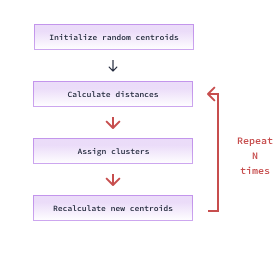

On this screen, we'll combine these steps into a single function that we'll call our k-means algorithm. This function will:

1. Split the clusters.
2. Print the number of iterations needed.
3. Plot the final clusters and centroids.
4. Work for a two-column DataFrame and any number of clusters.
5. Allow us to set the maximum number of iterations.

In [38]:
customers = customers[cols_to_keep].copy()

def kmeans(df, k, max_iter=100):
    variables = df.columns
    centroids, coords = get_centroids(df, k)

    for i in range(max_iter):
        last_coords = coords.copy()
        df, dist_names = calculate_distance(df, coords)
        df['cluster'] = df[dist_names].idxmin(axis=1).str[-1]
        centroids = df.groupby('cluster')[variables].mean()
        centroids.reset_index().drop('cluster', axis=1, inplace=True)
        coords = centroids.values.tolist()
        if last_coords == coords:
            break

    print(f'Maximum number of iteration {i + 1}')
    sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster', palette='tab10', data=df, s=50)
    sns.scatterplot(x='Annual Income', y='Spending Score', color='black', data=centroids, s=100)
    plt.show()

    return df['cluster']

Maximum number of iteration 3


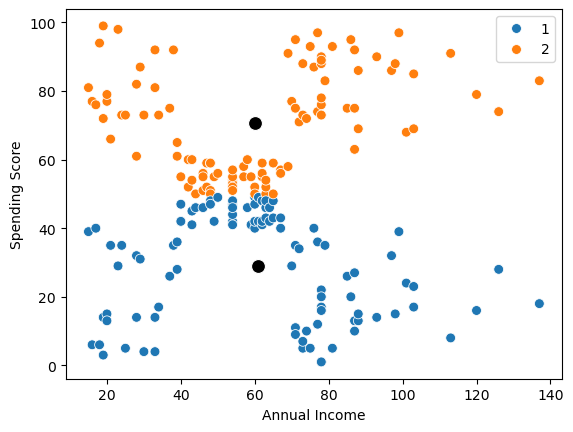

0      1
1      2
2      1
3      2
4      1
      ..
195    2
196    1
197    2
198    1
199    2
Name: cluster, Length: 200, dtype: object

In [39]:
kmeans(customers, k=2)

Total Iterations: 3


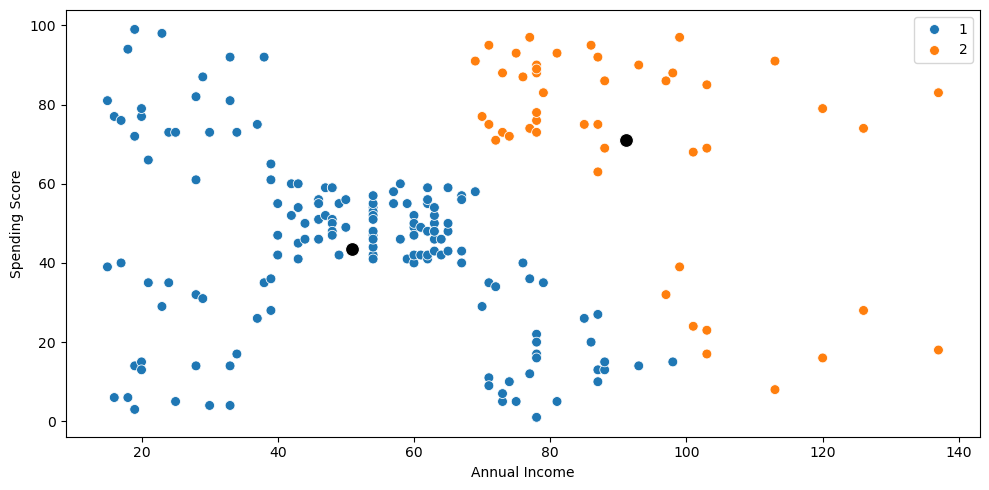

In [46]:
customers = pd.read_csv('../../Datasets/mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()


def kmeans(df, k, n_iterations=100):
    variables = df.columns

    centroids, coords = get_centroids(df, k)

    for i in range(n_iterations):
        last_coords = coords.copy()

        df, dists = calculate_distance(df, coords)

        df['cluster'] = df[dists].idxmin(axis=1).str.split('_').str[-1]

        centroids = round(df.groupby('cluster')[variables].mean(), 4)
        coords = centroids.values.tolist()

        if last_coords == coords:
      	    break
    
    print(f'Total Iterations: {i + 1}')

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(x=variables[0], y=variables[1], hue='cluster', palette='tab10', data=df, s=50, ax=ax)
    sns.scatterplot(x=variables[0], y=variables[1], color='black', data=centroids, s=100, ax=ax)


    plt.tight_layout()
    plt.show()

    return df['cluster']

  
clusters = kmeans(customers, 2)

In [50]:
customers

Annual Income  Spending Score  dist_centroid_1  dist_centroid_2 cluster
0               15              39        36.205373        82.577331       1
1               15              81        51.824459        76.779005       1
2               16               6        51.329317        99.341661       1
3               16              77        48.290906        75.364220       1
4               17              40        34.101821        80.346223       1
..             ...             ...              ...              ...     ...
195            120              79        77.618567        29.962737       2
196            126              28        76.701828        55.364841       2
197            126              74        81.000390        35.003794       2
198            137              18        89.826659        70.096474       2
199            137              83        94.666365        47.418516       2

[200 rows x 5 columns]

## Review
In this lesson, we created a more complete version of the K-means algorithm. We're now able to split the dataset into clusters, independent of the variables' names. It's also possible to set the number of clusters and maximum number of iterations.

In the next lesson, we'll look into metrics and defining the number of clusters.

## Number of Clusters and the Elbow Rule

In the previous lesson, we managed to write a single, complete function capable of splitting any DataFrame into as many clusters as we want to. This function, which we named `kmeans`, receives three arguments: `df`, `k`, and `n_iterations:

- `df` is the two-column DataFrame we want to split
- `k` is the number of clusters
- `n_iterations` is the maximum number of times the function should run while trying to find the convergence point.

The function plots the clustered dataset in a scatter plot and returns a Series containing the cluster for each data point.

Having already written the function, we've had time to experiment with different combinations of inputs. The results of the segmentation change as we change the variables, especially the number of clusters, which brings us to a question: which number should we use for `k`?

Occasionally, we may find ourselves in a position where the number of clusters is defined by a business rule. For instance, we may be asked to split customers given a particular set of variables into exactly two groups because the commercial and marketing teams only have the budget for two different advertising strategies. In this case, we have `k=2` already defined.

However, most of the time, the number of clusters will not be determined for us, and we'll have to find the best number of clusters for the dataset.

In this lesson, we'll learn the metrics and techniques used to evaluate whether the number of clusters is good enough and how to decide the best number for our dataset. We'll build on everything we've done so far to create the best possible split for the customers' data we are working with.

One of the most important metrics for evaluating a means algorithm is `inertia`. Inertia reflects how far the data points assigned to a cluster are from that cluster's centroid. Mathematically, inertia is the sum of the squared distances from each of 
n
 data points to a centroid, as given by the following formula:

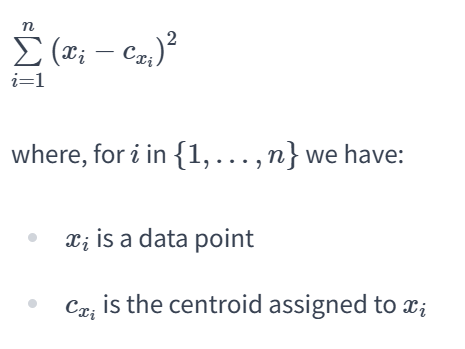

Notice that the formula uses the squared distance not only to keep all the numbers positive, but also to make sure that the more distant a point is to the cluster, the more the cluster will be penalized. This means that a cluster with some points very close to the centroid and some points very far from the centroid will present higher inertia than a cluster with points located at a medium distance from the centroid. Check the example below:

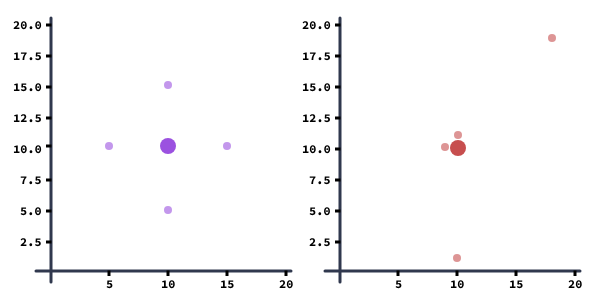

In the example, both clusters have four observations assigned to them. However, the blue cluster has better-distributed points. If we do the math, the distance from each point to the blue centroid is 5, which produces inertia equal to 100. On the other side, the red cluster has two points very close and two points very far from the centroid. The distances from each point to the red centroid are 1, 1, 9, and 12.04, which produces inertia equal to 228.

Inertia tells us that the blue cluster is much better than the red one because it's better distributed.

Inertia and the number of clusters are inversely proportional, which means that the lower the number of clusters, the higher the inertia.

For instance, consider a dataset with one hundred observations and imagine that we split it into one hundred clusters. This means that each observation is its own cluster. Therefore, the distance from each data point to its cluster centroid is zero, and the inertia is also zero. But if each one is a centroid, then none of them is a centroid, and we have no split at all.



On the other hand, if we split these one hundred observations into 10 clusters, the inertia will be greater than the zero we had when using one hundred clusters. However, it makes more sense to split a one hundred-row dataset into ten clusters than into one hundred, even though the inertia is higher.

The goal is to find the sweet spot in the inertia-clusters trade-off. We need to find the lower number of clusters that produces the lowest inertia and still makes sense to split the data with.

We have already covered calculating the distance between two points; now we can focus on the calculation of inertia.

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def kmeans(df, k, n_iterations=100, plot=False):
    variables = df.columns

    centroids, coords = get_centroids(df, k)

    for i in range(n_iterations):
        last_coords = coords.copy()

        df, dists = calculate_distance(df, coords)

        df['cluster'] = df[dists].idxmin(axis=1).str.split('_').str[-1]

        centroids = round(df.groupby('cluster')[variables].mean(), 4)
        coords = centroids.values.tolist()

        if last_coords == coords:
      	    break
    # def get_distance(row):
    #     cluster_num = row['cluster']
    #     return row[f'dist_centroid_{cluster_num}'] ** 2
    
    # df['sqrt_dist_centroid'] = df.apply(get_distance, axis=1)
    # inertia = df['sqrt_dist_centroid'].sum()
    df['sqrt_dist_centroid'] = df[dists].min(axis=1) ** 2
    inertia = df['sqrt_dist_centroid'].sum()
    
    print(f'Total Iterations: {i + 1}')
    if plot:
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.scatterplot(x=variables[0], y=variables[1], hue='cluster', palette='tab10', data=df, s=50, ax=ax)
        sns.scatterplot(x=variables[0], y=variables[1], color='black', data=centroids, s=100, ax=ax)
    
    
        plt.tight_layout()
        plt.show()

    return df['cluster'], inertia


customers = pd.read_csv('../../Datasets/mall_customers.csv')

cols_to_keep = ['Annual Income', 'Spending Score']
customers = customers[cols_to_keep].copy()

In [82]:
kmeans(customers, 2)

Total Iterations: 3


(0      2
 1      2
 2      2
 3      2
 4      2
       ..
 195    1
 196    1
 197    1
 198    1
 199    1
 Name: cluster, Length: 200, dtype: object,
 186481.78348466)

In [84]:
customers

Annual Income  Spending Score  dist_centroid_1  dist_centroid_2 cluster  \
0               15              39        76.737549        39.465554       2   
1               15              81        90.825214        43.380243       2   
2               16               6        79.731443        60.890156       2   
3               16              77        87.866871        40.359124       2   
4               17              40        74.847997        37.229732       2   
..             ...             ...              ...              ...     ...   
195            120              79        55.100721        73.116106       1   
196            126              28        34.810732        80.526745       1   
197            126              74        54.490100        77.535537       1   
198            137              18        47.663053        94.489393       1   
199            137              83        68.483769        90.527136       1   

     sqrt_dist_centroid  
0           1557.529919  
1           1881.845519  
2           3707.611119  
3           1628.858919  
4           1386.052919  
..                  ...  
195         3036.089431  
196         1211.787031  
197         2969.171031  
198         2271.766631  
199         4690.026631  

[200 rows x 6 columns]

## Calculating More Inertias

In the previous screen, we performed the clustering, but this time we also calculated the inertia for the clusters we created.

The result of inertia was a big number--over 184 thousand. But over 184 thousand what? As we're not using any particular unit of measurement, since we're calculating the distance between units of annual income and units of spending score, we can say that the inertia was over 184 thousand units of distance.

But this number doesn't make much sense by itself. In order to better understand this number, we'll compare it to other inertias on the same data.

The 184 thousand inertia refers to the split of the customers dataset between two clusters. The next step is to calculate the inertia for other numbers of clusters, which will make us capable of comparing and deciding whether or not 184 thousand is a big number and what a reasonable number for inertia should be.

In [85]:
inertias = []
customers = customers[cols_to_keep].copy()
for k in range(1, 11):
    _, inertia = kmeans(customers[cols_to_keep], k)
    inertias.append(inertia)

print(inertias)

Total Iterations: 2
Total Iterations: 6
Total Iterations: 3
Total Iterations: 5
Total Iterations: 6
Total Iterations: 11
Total Iterations: 12
Total Iterations: 8
Total Iterations: 6
Total Iterations: 100
[269981.27999999997, 181363.5959597, 106348.37306241, 73880.64496278, 44454.476479920006, 37265.86520509, 34692.333028349996, 25343.88912598, 27218.73544109, 24971.19403496]


## The Elbow Curve

From the results of the previous screen, the inertia decreased as the number of clusters increased. That makes perfect sense with what we discussed before: if the number of clusters keeps increasing until it reaches the number of observations in the dataset, inertia will be zero.

But when is it enough? At which point should we say that the inertia has decreased to a point where we're comfortable using that number of clusters?

Keeping in mind that the ideal model has few clusters and low inertia, we can see the number of clusters as the cost of lowering inertia.

In order to increase our cost by increasing the number of clusters by one, we must have a gain in inertia or, in other words, a better model. We should stop adding clusters when the gain in inertia increases at lower and lower rates. In economics, this is called [diminishing returns](https://en.wikipedia.org/wiki/Diminishing_returns).

That's when the Elbow Curve comes in. The Elbow Curve is nothing more than a line plot of the inertias against the number of clusters. Since the values on the y-axis are decreasing while the values on the x-axis are increasing, the curve should look like this:

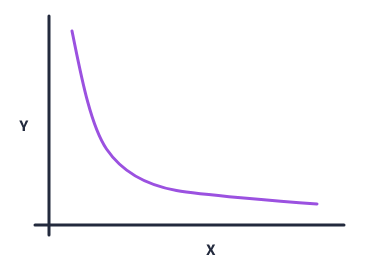

For this particular use case, we call it the elbow curve because we assume that the first clusters will cause the inertia to decrease very fast, and, at some point, this decrease will become slower in such a way that we'll see a sharp "elbow" on the curve:

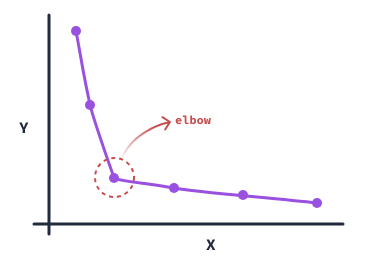

This sharp "elbow" is where we should set our number of clusters.

The bottom line is that the Elbow Curve allows us to visually understand how the number of clusters affects the quality of the model. As we said in the previous screen, a single value for inertia does not say anything, but a visual representation of many inertias put together makes it a lot easier to set the number of clusters for our model.

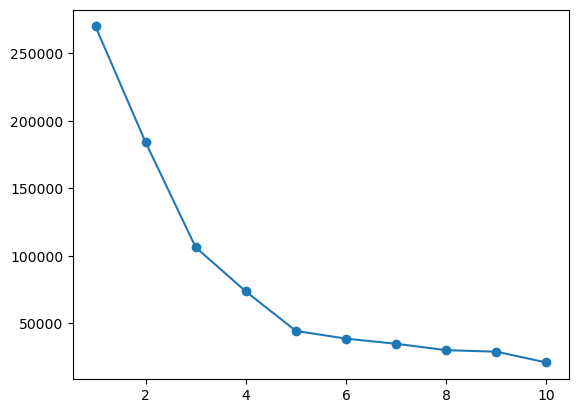

In [87]:
inertias = [269981.27999999997, 184131.88502826, 106348.37306241, 
            73679.78903966, 44448.45544817, 38718.38226857,
            34918.93964226, 30176.132287570003, 29068.11150443,
            21063.88614989]
plt.plot(range(1,11),inertias, marker='o')
plt.show()

## Choosing K

In the previous screen, we plotted the Elbow Curve for k going from one to ten. The elbow isn't very sharp, but a broader elbow made of three points.

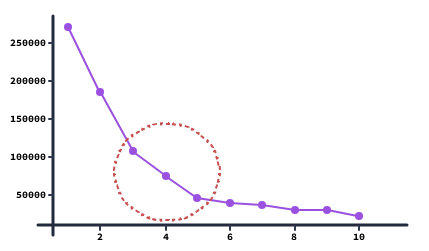

That's actually the most common scenario we'll deal with when working with k-means and inertia. Occasionally, we'll see a very sharp elbow that leaves no doubt about the number of clusters, but that's not the most common scenario.

In this case, all three points would've been a reasonable acceptable choice. Notice that there are decreases from 1 to 2 and from 2 to 3. The decreases from 3 to 4 and 4 to 5 are smaller. It's from point 5 to point 6 that we have the biggest decrease in inertia.

Notice the line becomes almost horizontal at this point. If we do the math, that's actually the lowest percent loss of inertia. The image below shows the percent decrease in inertia, and we move to each new number of K:

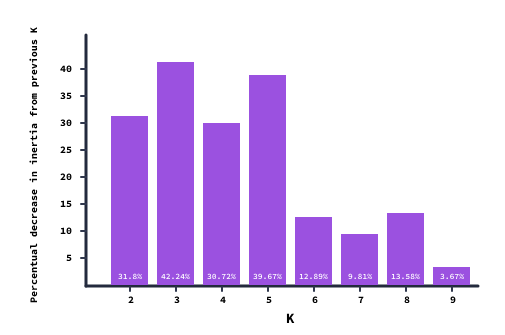

Notice that until k=5, the decrease is much higher, and it's going up and down, which means it's not decreasing at lower and lower rates. From the fifth to the sixth point, the decrease is dramatically lower.

Finally, clustering is usually related to business and operations areas in companies, since we're frequently looking to segment customers, stores, products, purchases, and more.

For instance, let's say we're segmenting these customers so each cluster can have its advertisement strategy held by a single team in the marketing department. However, the marketing department only has four of these teams available right now. With this information, we can discard the strategy of using five clusters.

In another example, let's say we're not segmenting customers, but stores in a big chain of supermarkets in our city. The company has built five distribution centers, strategically located around the city, and, although a distribution center can service up to two clusters, they all need to have at least one cluster assigned to them. This means we would need a minimum of five clusters and by looking at the curve, we would definitely choose five.

Always be aware of input from business teams when making decisions about the ideal number of clusters for your problem.

Total Iterations: 7


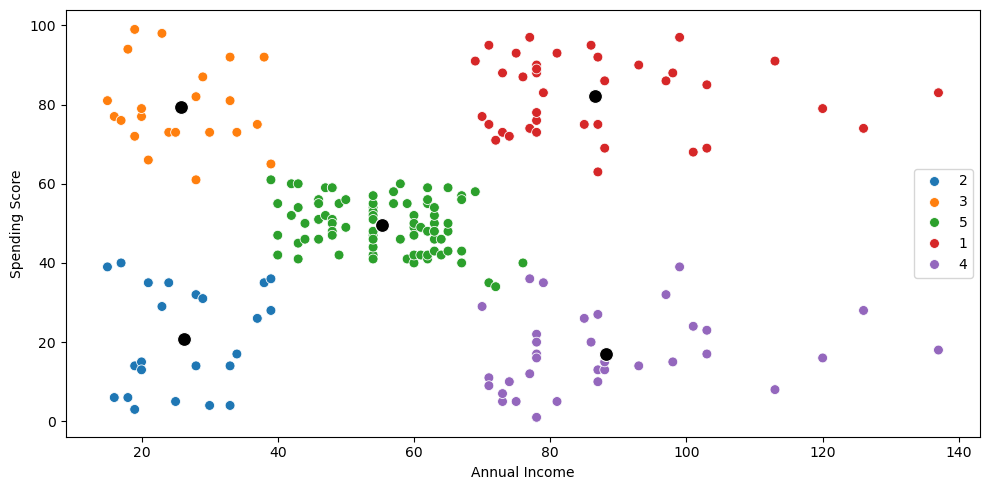

In [91]:
customers = customers[cols_to_keep].copy()
clusters, inertia = kmeans(customers, 5, plot=True)

## Next Steps
In this lesson, we finished building a k-means algorithm from scratch and also became familiar with the concept of inertia and how to use the Elbow Curve.

In next the lesson, we'll get to know scikit-learn's implementation of k-means and how to analyze and interpret the results of a clusterization.